# Installation

In [ ]:
%cd /content/

/content


In [ ]:
import time
import numpy
# for mxnet
!pip install --upgrade mxnet
# for pytorch
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

!pip install --upgrade gluoncv

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.

#Pretrained inference

In [ ]:
import time
from matplotlib import pyplot as plt
from gluoncv.utils import viz
from gluoncv.data.transforms import presets
from gluoncv.model_zoo import get_model

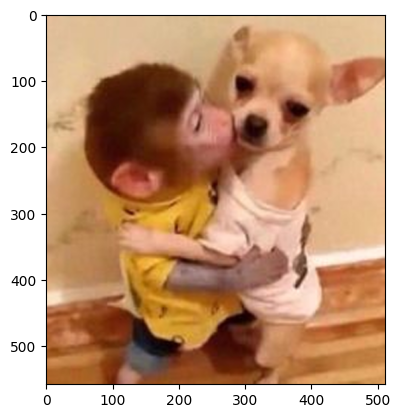

In [ ]:
x, img = presets.rcnn.load_test('/content/3.jpeg', short=512)
viz.plot_image(img)
plt.show()

In [ ]:
net = get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)


121888KB [00:02, 42785.82KB/s]                            


Prediction time:  0.05582451820373535


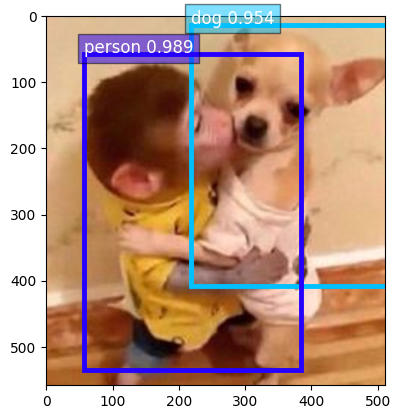

In [ ]:
tic = time.time()
class_IDs, scores, bounding_boxs = net(x)
print('Prediction time: ', time.time() - tic)
viz.plot_bbox(img, bounding_boxs[0], scores[0], class_IDs[0], class_names=net.classes)
plt.show()

#Training - Truc Script

## Dataset

In [ ]:
!mkdir -p "./mxnet/datasets/"

In [ ]:
%cd /content/mxnet/datasets

/content/mxnet/datasets


In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

--2024-01-25 18:04:47--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  31.2MB/s    in 63s     

2024-01-25 18:05:51 (30.2 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [ ]:
!tar -xvf /content/mxnet/datasets/VOCtrainval_11-May-2012.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC

In [ ]:
from gluoncv.data import VOCDetection

# typically we use 2007+2012 trainval splits for training data
train_dataset = VOCDetection(root='/content/mxnet/datasets/VOCdevkit/', splits=[(2012, 'train')])
# and use 2007 test as validation data
val_dataset = VOCDetection(root='/content/mxnet/datasets/VOCdevkit/',splits=[(2012, 'val')])

print('Training images:', len(train_dataset))
print('Validation images:', len(val_dataset))

Training images: 5717
Validation images: 5823


## Faster-RCNN Network

In [ ]:
from gluoncv.model_zoo import get_model

net = get_model('faster_rcnn_resnet50_v1b_voc', pretrained_base=False)
net.initialize()
print(net)

FasterRCNN(
  (features): HybridSequential(
    (0): Conv2D(None -> 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=True, in_channels=64)
    (2): Activation(relu)
    (3): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (4): HybridSequential(
      (0): BottleneckV1b(
        (conv1): Conv2D(None -> 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=True, in_channels=64)
        (relu1): Activation(relu)
        (conv2): Conv2D(None -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=True, in_channels=64)
        (relu2): Activation(relu)
        (conv3): Conv2D(None -> 256, kernel_size=(1, 1), stride=(1, 1), b

## Data transform

In [ ]:
from gluoncv.data.transforms import presets
from gluoncv.utils.random import seed
import mxnet as mx
from mxnet import autograd

In [ ]:
short, max_size = 600, 1000  # resize image to short side 600 px, but keep maximum length within 1000
train_transform = presets.rcnn.FasterRCNNDefaultTrainTransform(short, max_size, net)
val_transform = presets.rcnn.FasterRCNNDefaultValTransform(short, max_size, net)

In [ ]:
seed(233)  # fix seed in this tutorial

## Data loader

In [ ]:
from gluoncv.data.batchify import Tuple, Append, FasterRCNNTrainBatchify
from mxnet.gluon.data import DataLoader

num_workers = 0  # you can make it larger(if your CPU has more cores) to accelerate data loading

# behavior of batchify_fn: stack images, and pad labels
batchify_fn = FasterRCNNTrainBatchify(net)
batch_size = 1
train_loader = DataLoader(train_dataset.transform(train_transform), batch_size, shuffle=True,
                          batchify_fn=batchify_fn, last_batch='rollover', num_workers=num_workers)
val_loader = DataLoader(val_dataset.transform(val_transform), batch_size, shuffle=False,
                        batchify_fn=batchify_fn, last_batch='keep', num_workers=num_workers)

for ib, batch in enumerate(train_loader):
    if ib > 3:
        break
    print('data 0:', batch[0][0].shape, 'label 0:', batch[1][0].shape)

data 0: (3, 600, 800) label 0: (1, 6)
data 0: (3, 600, 896) label 0: (3, 6)
data 0: (3, 600, 800) label 0: (3, 6)
data 0: (3, 600, 901) label 0: (1, 6)


## Training losses

In [ ]:
# the loss to penalize incorrect foreground/background prediction
rpn_cls_loss = mx.gluon.loss.SigmoidBinaryCrossEntropyLoss(from_sigmoid=False)
# the loss to penalize inaccurate anchor boxes
rpn_box_loss = mx.gluon.loss.HuberLoss(rho=1 / 9.)  # == smoothl1
# the loss to penalize incorrect classification prediction.
rcnn_cls_loss = mx.gluon.loss.SoftmaxCrossEntropyLoss()
# and finally the loss to penalize inaccurate proposals
rcnn_box_loss = mx.gluon.loss.HuberLoss()  # == smoothl1

## Training loop

### Define trainer

In [ ]:
trainer =  mx.gluon.Trainer(
    net.collect_params(), 'sgd',
    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9})

In [ ]:
for epoch in range(10):
    net.hybridize(static_alloc=True, static_shape=True)

    # train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time.time()
    for ib, batch in enumerate(train_loader):
        rpn_cls_losses = []
        rpn_box_losses = []
        rcnn_cls_losses = []
        rcnn_box_losses = []

        if ib > 0:
            break
        with autograd.record():
            for data, label, rpn_cls_targets, rpn_box_targets, rpn_box_masks in zip(*batch):
              label = label.expand_dims(0)
              gt_label = label[:, :, 4:5]
              gt_box = label[:, :, :4]
              # network forward
              cls_preds, box_preds, roi, samples, matches, rpn_score, rpn_box, anchors, cls_targets, \
                  box_targets, box_masks, _ = net(data.expand_dims(0), gt_box, gt_label)

              # losses of rpn
              rpn_score = rpn_score.squeeze(axis=-1)
              num_rpn_pos = (rpn_cls_targets >= 0).sum()
              rpn_loss1 = rpn_cls_loss(rpn_score, rpn_cls_targets,
                                      rpn_cls_targets >= 0) * rpn_cls_targets.size / num_rpn_pos
              rpn_loss2 = rpn_box_loss(rpn_box, rpn_box_targets,
                                      rpn_box_masks) * rpn_box.size / num_rpn_pos

              # losses of rcnn
              num_rcnn_pos = (cls_targets >= 0).sum()
              rcnn_loss1 = rcnn_cls_loss(cls_preds, cls_targets,
                                        cls_targets >= 0) * cls_targets.size / cls_targets.shape[
                              0] / num_rcnn_pos
              rcnn_loss2 = rcnn_box_loss(box_preds, box_targets, box_masks) * box_preds.size / \
                          box_preds.shape[0] / num_rcnn_pos

              # Total loss
              sum_loss = rpn_loss1 + rpn_loss2 + rcnn_loss1 + rcnn_loss2

              # Add losses
              rpn_cls_losses.append(rpn_loss1)
              rpn_box_losses.append(rpn_loss2)
              rcnn_cls_losses.append(rcnn_loss1)
              rcnn_box_losses.append(rcnn_loss2)

            autograd.backward([rpn_loss1, rpn_loss2, rcnn_loss1, rcnn_loss2])
        trainer.step(batch_size)

    # # _, val_acc = test(net, val_loader, ctx)
    # for ib_val, batch_val in enumerate(val_loader):
    #     if ib_val > 0:
    #         break
    #     for data, label, rpn_cls_targets, rpn_box_targets, rpn_box_masks in zip(*batch_val):
    #         label = label.expand_dims(0)
    #         gt_label = label[:, :, 4:5]
    #         gt_box = label[:, :, :4]

    #         # network forward
    #         cls_preds, _, _, _, _, _, _, _, _, _, _, _ = net(data.expand_dims(0), gt_box, gt_label)

    #         # Assuming you have a function compute_accuracy(predictions, labels) for accuracy calculation
    #         valid_acc += acc(cls_preds, cls_targets)


    # # Calculate average training loss and accuracy
    # avg_train_loss = train_loss / len(train_loader)
    # avg_train_acc = train_acc / len(train_loader)

    # # Calculate average validation accuracy
    # avg_valid_acc = valid_acc / len(val_loader)

    # print epoch information or any other information you want to track
    print(f"Epoch {epoch + 1}, Time taken: {time.time() - tic:.2f}s")
    # print(f"Training Loss: {avg_train_loss}, Training Accuracy: {avg_train_acc}, Validation Accuracy: {avg_valid_acc}")

Epoch 1, Time taken: 39.63s
Epoch 2, Time taken: 31.36s
Epoch 3, Time taken: 26.06s
Epoch 4, Time taken: 28.10s
Epoch 5, Time taken: 27.14s
Epoch 6, Time taken: 27.82s
Epoch 7, Time taken: 27.41s
Epoch 8, Time taken: 26.75s
Epoch 9, Time taken: 26.27s
Epoch 10, Time taken: 26.72s


### save model

In [ ]:
from gluoncv.utils import export_block

In [ ]:
net.save_parameters('faster_rcnn_resnet50_v1b_voc_tttt.params')

In [ ]:
net.export('faster_rcnn_resnet50_v1b_voc_tttt_t.params')

#Pretrained inference

In [ ]:
import time
from gluoncv.data.transforms import presets
from gluoncv.model_zoo import get_model

In [ ]:
net_load = get_model('faster_rcnn_resnet50_v1b_voc', pretrained_base=False)
net_load.load_parameters('/content/faster_rcnn_resnet50_v1b_voc_tttt_t.params-0000.params')

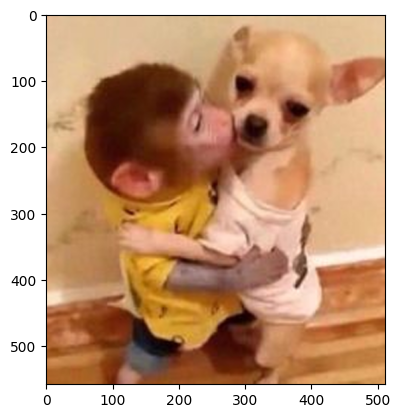

In [ ]:
x, img = presets.rcnn.load_test('/content/3.jpeg', short=512)
viz.plot_image(img)
plt.show()

In [ ]:
tic = time.time()
class_IDs, scores, bounding_boxs = net(x)
print('Prediction time: ', time.time() - tic)
viz.plot_bbox(img, bounding_boxs[0], scores[0], class_IDs[0], class_names=net.classes)
plt.show()

ValueError: The argument structure of HybridBlock does not match the cached version. Stored format = [0], input format = [0, 0, 0]